In [1]:
import pandas as pd

df_users_limpio = pd.read_csv('Dataset/datos_users_limpio.csv')

### Familiarización con los datos

In [2]:
# Imprimimos todas las columnas del describe
pd.set_option('display.max_columns', 500)

df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17


Nos encontramos en un dataset de usuarios, por lo que cada línea fila del dataset es un usuario. Cabe destacar que todos los números de cada fila hacen referencia al total que ese usuario ha tenido en el sistema. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

- **num_opiniones**: Opiniones que el usuario ha hecho en total a lo largo de su trayectoria. Un número elevado de opiniones puede significar muchos años siendo experto, muchos seguidores y con ser influencer. 


- **util, gracioso y guay**: Veces que el usuario ha sido puntuado como útil, gracioso o guay, respectivamente. Podría estar relacionado con número de seguidores, todos los tipos de likes e incluso número de opiniones. SOBRE OTRA GENTE.


- **experto**: Lista con los años en los que el usuario ha sido experto en el sistema. Las personas que no han sido experto (que son la mayoría), tienen el string "Ninguno".


- **amigos**: Lista de los ID de los amigos que tiene ese usuario. Algunos usuarios **no tienen amigos**. Esto es puntualizado con el string "SinAmigos".


- **num_amigos**: Número de amigos que tiene el usuario. Introducimos esta columna ya que tratar con la lista de amigos no es útil en la mayoría de los casos.


- **seguidores**: Número de seguidores que ese usuario tiene en total. Los usuarios con un número de seguidores elevado pueden ser significativos.


- **media_puntuacion**: Puntuación media que tiene el usuario en todas sus opiniones. Una media bastante alta podría ser un indicativo de que ha sido experto durante muchos años. Podría ocurrir que una persona tuviera muchísimas opiniones pero todas tuvieran una puntuación muy baja. Estos usuarios podrían ser denominados **"spammers"**.


- **like_X**: Todas las columnas de like se refieren al número de likes del tipo X que ha recibido el usuario a lo largo de su trayectoria en el sistema. Al igual que util, gracioso y guay, podría estar relacionado con número de opiniones y seguidores.


- **año_reg, mes_reg, etc...**: Fecha de registro fraccionada en año, mes, día y hora. Podría ser que hubiera días en los que se produjeran más registros a lo largo de la semana, **generando patrones interesantes**. En algunos momentos, se pueden producir **registros masivos** debido a algún evento especial (algún anuncio nuevo, se habla del sistema en la televisión, etc...)


<span style="color:red">Podríamos plantearnos añadir una nueva collumna que fuera hacer cuántos años ser registró el usuario en la aplicación ya que puede estar directamente relacionado con los años expertos. Esto es a largo plazo, para los modelos</span>

### Análisis descriptivo de los datos

Como todos los likes tienen un comportamiento parecido, vamos a hacer una nueva columna que tenga la suma de todos ellos.

In [2]:
# Introducimos la nueva columna "num_likes"
df_users_limpio["num_likes"] = df_users_limpio.iloc[:, 11:22].sum(axis = 1)
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,...,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg,num_likes
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,...,1,1,1,2,0,2013,10,8,23,8
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,...,0,1,1,0,0,2013,2,21,22,3
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,...,0,0,0,0,0,2013,10,4,0,1
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,...,2,0,0,1,0,2014,5,22,15,4
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,...,57,80,80,25,5,2013,10,23,7,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,...,0,0,0,0,0,2016,2,24,19,0
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,...,0,0,0,0,0,2017,2,25,23,0
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,...,0,0,0,0,0,2009,8,19,22,0
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,...,0,0,0,0,0,2018,10,15,17,0


In [8]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:22] + cols[-1:] + cols[22:-1]

print(cols)
# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

['usuario_id', 'nombre', 'num_opiniones', 'util', 'gracioso', 'guay', 'experto', 'amigos', 'num_amigos', 'seguidores', 'media_puntuacion', 'like_moda', 'like_extras', 'like_perfil', 'like_formato', 'like_lista', 'like_comentario', 'like_simple', 'like_guay', 'like_divertido', 'like_textos', 'like_fotos', 'num_likes', 'anyo_reg', 'mes_reg', 'dia_reg', 'hora_reg']


In [9]:
# Lo ponemos de esta forma para quitar la notación científica
df_users_limpio.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,num_opiniones,util,gracioso,guay,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,...,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,mes_reg,dia_reg,hora_reg
count,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,...,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06
mean,22.2877,40.5277,17.9178,21.8805,45.7152,1.46565,3.68146,2.24223,0.332595,0.213513,...,3.09027,3.10682,3.10682,1.16533,1.13843,16.1737,2013.47,6.4201,15.7372,12.5857
std,76.9224,470.242,330.35,401.968,137.863,15.6832,1.15104,80.2182,13.6785,16.2668,...,92.1142,88.2326,88.2326,32.6826,95.4914,517.442,2.60379,3.36132,8.80282,8.11387
min,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2004,1,1,0
25%,2,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,2012,4,8,4
50%,5,3,0,0,2,0,3.89,0,0,0,...,0,0,0,0,0,0,2014,6,16,16
75%,15,13,3,3,39,0,4.6,0,0,0,...,0,0,0,0,0,1,2015,9,23,20
max,13278,154202,130207,148658,14995,9538,5,34167,13500,14173,...,52103,32266,32266,15442,82602,277077,2018,12,31,23


Observando la tabla descriptiva de los datos, podemos obtener la siguiente información con importancia:

- **num_opiniones:** 
    - La mayor parte de los usuarios tienen un **número de opiniones relativamente bajo** (los tres primeros cuartiles están por debajo de 16 opiniones). 
    - **Número de opiniones máximo en todos los usuarios de 13.278**, bastante elevado con respecto al resto de usuarios. 
    - Aún habiendo un máximo muy elevado, la media y la desviación estándar no toman valores muy grandes, lo cual nos quiere decir que **no hay demasiada gente con muchas opiniones**.


- **util, gracioso y guay:** 
    - El **75% de los usuarios del sistema reciben "util"**. 
    - Solo el **50% reciben al menos un "gracioso" y "guay"**. 
    - Las tres columnas tienen un máximo muy elevado lo cual indica la **existencia de algunas opiniones virales o de usuarios con muchas opiniones muy útiles**.


- **num_amigos:** 
    - Hay un **25% de usuarios sin amigos**. 
    - Un **25% tiene más de 39 amigos**. 
    - La media es de 45 amigos, lo cual nos quiere decir que del 25% recién mencionado (el que tiene 39 amigos o más), debe haber gente con muchos amigos. 
    - El **máximo es muy elevado**, como en el resto de columnas recientemente mencionadas (14995 amigos). 


- **seguidores:** 
    - Como dato destacado, como mínimo el **75% de los usuarios NO tienen ningún seguidor** pero el **máximo de seguidores es muy elevado** (9538). 
    - Esto sumado a que la media y la desviación estándar son muy pequeñas, nos indica que hay un **número de usuarios muy pequeño con muchísimos seguidores (influencers)**.


- **media_puntuacion:**
    - Las puntuaciones son buenas en general. Al menos un **75% de los usuarios tienen como mínimo un 3 de media**.
    - Un **25% de los usuarios tiene menos de un 1 de media**, lo cual puede llegar a ser significativo. Las opiniones con notas tan bajas podrían tenerse en cuenta aparte para comprobar si son **spam** y no aportan nada.


- **Likes:** (Vamos a hablar de ellos todos juntos porque son muchos y se comportan de forma similar)
    - Como mínimo, el **50% de los usuarios reciben 0 likes de cualquier tipo** (atendiendo a la columna num_likes).
    - Un **25% de los usuarios del sistema reciben al menos 1 like** de cualquier tipo.
    - <span style="color:red">"like_guay" y "like_divertido" tienen exactamente la misma desviación, media, máximo y mínimo. Esto podría ser un error una redundancia en la base de datos.</span>
    - El like con el máximo más alto es **"like_fotos"**. Esto puede ser un indicio no solo de que este like es el que más se utiliza, sino también que **la gente del sistema están normalmente más interesada en las fotografías**
    - El like con el máximo más bajo es **"like_lista"**. No sabemos a qué hace referencia este tipo de like, pero parece que las "listas" son las menos interesantes para los usuarios.
    
    
<span style="color:red">Podríamos contar el número de likes total de todos los tipos de likes para ver cuál es el más utilizado. También puede servir para ver cuál es el tema más interesante para la mayoría de las personas.</span>

In [8]:
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,8,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,3,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,1,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,4,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,293,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,0,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,0,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,10,15,17


Text(0.5, 1.0, 'Numero de registros por año')

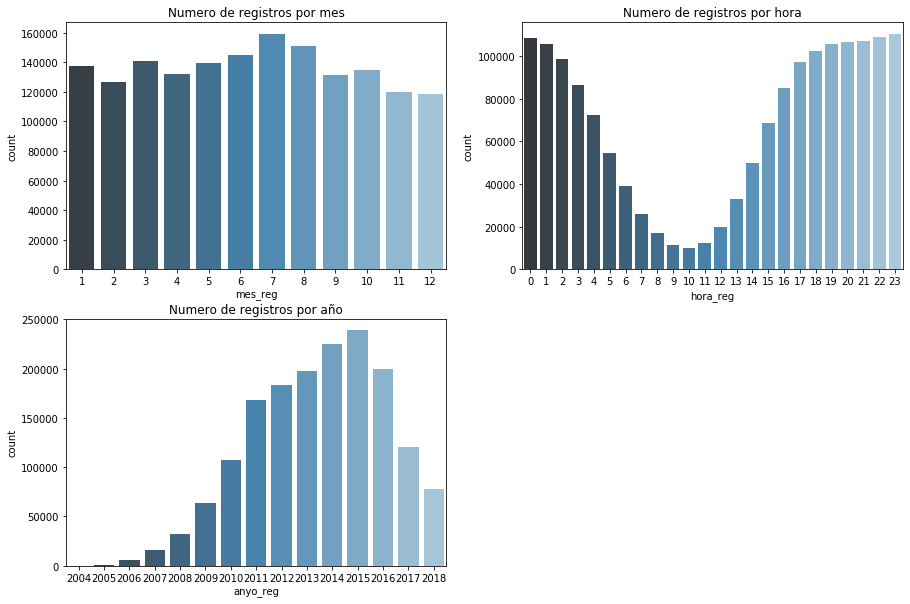

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.countplot(x="mes_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por mes")

ax = fig.add_subplot(2, 2, 2)
ax = sns.countplot(x="hora_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por hora")

ax = fig.add_subplot(2, 2, 3)
ax = sns.countplot(x="anyo_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por año")

Cosas que podemos hacer:
- Clusterización jerárquica 
- Hacer un cluster con los números de usuarios para poder discretizarlos correctamente y poder hacer boxplot y encontrar overlies. 
- Podríamos diferenciar en algún punto entre los usuarios que tienen alguna opinion y los usuarios que no.
- Hacer boxplot y distribuciones que nos puedan hacer detectar overlies.
    - 

- Detectar spammers reconociendo aquellas personas con muy poca puntuación y muchísimas opiniones.
- Detectar hackers que tengan media de puntuación de opiniones de 5 y muchísimas opiniones.
- Detectar influencers discretizando por el número de opiniones o de likes.
- Detectar personas clones. Que tengan el mismo nombre, los mismos elementos menos el id.

- Ver si desaparecen algunos tipos de likes debido al desuso. Al final la empresa se queda con unos pocos likes

- Discretizar entre negocios que han cerrado y los que no. Hacer análisis aparte
- Cuál es el negocio con la mayor puntuación
- Cuál es el negocio más frecuente.